# **Phân tích bộ dữ liệu đánh giá phát hiện xâm nhập (CIC-IDS2017)**

## Đặc điểm bộ dữ liệu

### 2.1 Xem dữ liệu và phân tích hàng, cột

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
import warnings

In [20]:
# Danh sách các cột cần đọc với tên mới tương ứng
usecols_features_importance = [
    ' Average Packet Size',
    ' Avg Bwd Segment Size',
    ' Avg Fwd Segment Size',
    ' Bwd Header Length',
    'Bwd Packet Length Max',
    ' Bwd Packet Length Mean',
    ' Fwd Packet Length Max',
    ' Fwd Packet Length Mean',
    ' Init_Win_bytes_backward',
    ' Max Packet Length',
    ' Packet Length Mean',
    ' Packet Length Std',
    ' Subflow Fwd Bytes',
    'Total Length of Fwd Packets',
    ' Label'
]

# Đọc dữ liệu với các cột được cập nhật
data1 = pd.read_csv('MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv', usecols=usecols_features_importance)
data2 = pd.read_csv('MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv', usecols=usecols_features_importance)
data3 = pd.read_csv('MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv', usecols=usecols_features_importance)
data4 = pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', usecols=usecols_features_importance)
data5 = pd.read_csv('MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', usecols=usecols_features_importance)
data6 = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv', usecols=usecols_features_importance)
data7 = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', usecols=usecols_features_importance)
data8 = pd.read_csv('MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', usecols=usecols_features_importance)

# Gộp tất cả các tệp dữ liệu vào danh sách
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start=1):
    rows, cols = data.shape
    print(f'Data{i} -> {rows} rows, {cols} columns')


Data dimensions: 
Data1 -> 529918 rows, 15 columns
Data2 -> 445909 rows, 15 columns
Data3 -> 692703 rows, 15 columns
Data4 -> 170366 rows, 15 columns
Data5 -> 288602 rows, 15 columns
Data6 -> 191033 rows, 15 columns
Data7 -> 286467 rows, 15 columns
Data8 -> 225745 rows, 15 columns


In [21]:
data = pd.concat(data_list)
rows, cols = data.shape
print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 15
Total cells: 42461145


In [22]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [23]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [24]:
pd.options.display.max_rows = 15
warnings.simplefilter("ignore", category=RuntimeWarning)
print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
Total Length of Fwd Packets,2830743.0,549.302415,9.993589e+03,0.000000e+00,12.0,62.000000,187.000000,1.290000e+07
Fwd Packet Length Max,2830743.0,207.599941,7.171848e+02,0.000000e+00,6.0,37.000000,81.000000,2.482000e+04
Fwd Packet Length Mean,2830743.0,58.201939,1.860912e+02,0.000000e+00,6.0,34.000000,50.000000,5.940857e+03
Bwd Packet Length Max,2830743.0,870.849455,1.946367e+03,0.000000e+00,0.0,79.000000,280.000000,1.953000e+04
Bwd Packet Length Mean,2830743.0,305.949281,6.052568e+02,0.000000e+00,0.0,72.000000,181.000000,5.800500e+03
Bwd Header Length,2830743.0,-2273.275320,1.452209e+06,-1.073741e+09,20.0,40.000000,104.000000,5.838440e+06
Max Packet Length,2830743.0,950.402445,2.028229e+03,0.000000e+00,6.0,87.000000,525.000000,2.482000e+04
Packet Length Mean,2830743.0,171.944390,3.054915e+02,0.000000e+00,6.0,57.200000,119.800000,3.337143e+03
Packet Length Std,2830743.0,294.975554,6.318001e+02,0.000000e+00,0.0,25.980762,174.323949,4.731522e+03
Average Packet Size,2830743.0,191.983658,3.318603e+02,0.000000e+00,7.5,72.250000,149.263932,3.893333e+03


In [25]:
pd.options.display.max_columns = 15
data

,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Header Length,Max Packet Length,Packet Length Mean,Packet Length Std,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_backward,Label
0,12,6,6.0,0,0.0,0,6,6.0,0.0,9.0,6.0,0.0,12,-1,BENIGN
1,12,6,6.0,0,0.0,0,6,6.0,0.0,9.0,6.0,0.0,12,-1,BENIGN
2,12,6,6.0,0,0.0,0,6,6.0,0.0,9.0,6.0,0.0,12,-1,BENIGN
3,12,6,6.0,0,0.0,0,6,6.0,0.0,9.0,6.0,0.0,12,-1,BENIGN
4,12,6,6.0,0,0.0,0,6,6.0,0.0,9.0,6.0,0.0,12,-1,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,6,6,6.0,6,6.0,20,6,6.0,0.0,9.0,6.0,6.0,6,253,BENIGN
225741,6,6,6.0,6,6.0,20,6,6.0,0.0,9.0,6.0,6.0,6,253,BENIGN
225742,6,6,6.0,6,6.0,20,6,6.0,0.0,9.0,6.0,6.0,6,253,BENIGN
225743,12,6,6.0,0,0.0,0,6,6.0,0.0,9.0,6.0,0.0,12,-1,BENIGN


### Làm sạch dữ liệu

In [26]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 0
Missing values after processing infinite values: 0


In [27]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Series([], dtype: int64)


In [28]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

Empty DataFrame
Columns: [Missing Values, Percentage of Total Values]
Index: []


### 2.3 Gộp label

In [29]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

##### Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

In [31]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [32]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2273097
DoS              252661
Port Scan        158930
DDoS             128027
Brute Force       13835
Web Attack         2180
Bot                1966
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [33]:
data.drop('Label', axis = 1, inplace = True)

C:\Users\duong\AppData\Local\Temp\ipykernel_14108\323780027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


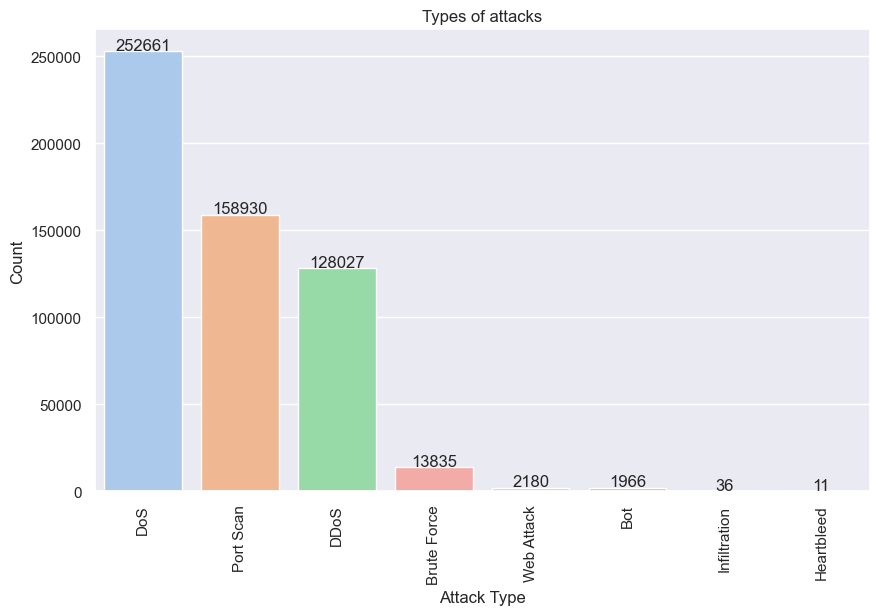

In [34]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

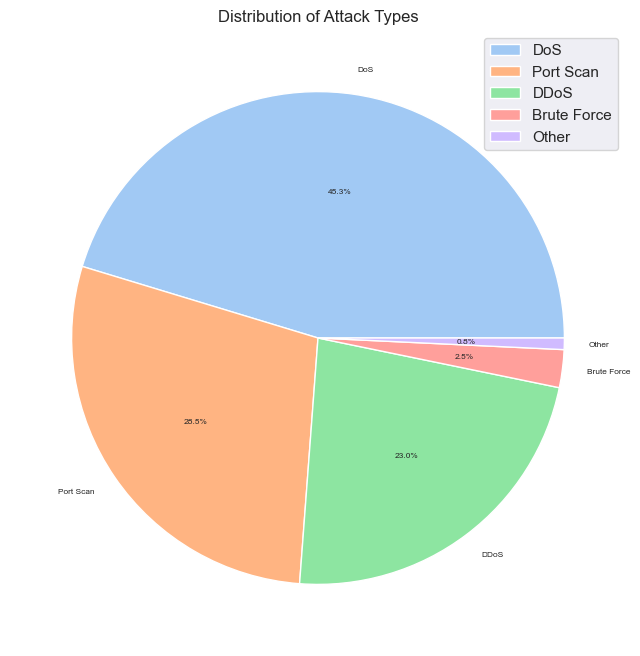

In [35]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [36]:
data.groupby('Attack Type').first()

,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Header Length,Max Packet Length,Packet Length Mean,Packet Length Std,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_backward
Attack Type,,,,,,,,,,,,,,
BENIGN,12,6,6.000000,0,0.000000,0,6,6.000000,0.000000,9.000000,6.000000,0.000000,12,-1
Bot,322,322,35.777778,256,28.444444,296,322,30.421053,91.783753,32.111111,35.777778,28.444444,322,110
Brute Force,0,0,0.000000,0,0.000000,40,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,28960
DDoS,26,20,8.666667,5840,1658.142857,152,5840,1057.545455,1853.437529,1163.300000,8.666667,1658.142857,26,229
DoS,1101,410,137.625000,3525,703.666667,132,3525,354.866667,895.115146,380.214286,137.625000,703.666667,1101,254
Heartbleed,8299,517,3.090875,17376,4370.686524,55336,17376,1713.525708,2669.389319,1713.913910,3.090875,4370.686524,8299,235
Infiltration,141,93,28.200000,267,48.500000,132,267,36.000000,77.399789,39.272727,28.200000,48.500000,141,229
Port Scan,703,356,117.166667,1050,282.800000,168,1050,176.416667,317.471103,192.454545,117.166667,282.800000,703,243
Web Attack,1022,372,146.000000,1047,331.571429,232,1047,222.866667,331.323939,238.785714,146.000000,331.571429,1022,252


## 3. Tiền xử lý dữ liệu

### Downcast từ float64 thành float32

In [37]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 345.55 MB
Final memory usage: 194.37 MB


In [38]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 43.75%


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 15 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Total Length of Fwd Packets  int32  
 1   Fwd Packet Length Max        int32  
 2   Fwd Packet Length Mean       float32
 3   Bwd Packet Length Max        int32  
 4   Bwd Packet Length Mean       float32
 5   Bwd Header Length            int32  
 6   Max Packet Length            int32  
 7   Packet Length Mean           float32
 8   Packet Length Std            float32
 9   Average Packet Size          float32
 10  Avg Fwd Segment Size         float32
 11  Avg Bwd Segment Size         float32
 12  Subflow Fwd Bytes            int32  
 13  Init_Win_bytes_backward      int32  
 14  Attack Type                  object 
dtypes: float32(7), int32(7), object(1)
memory usage: 194.4+ MB


In [40]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Length of Fwd Packets,2830743.0,549.302415,9.993589e+03,0.000000e+00,12.0,62.000000,187.000000,1.290000e+07
Fwd Packet Length Max,2830743.0,207.599941,7.171848e+02,0.000000e+00,6.0,37.000000,81.000000,2.482000e+04
Fwd Packet Length Mean,2830743.0,58.201962,1.860912e+02,0.000000e+00,6.0,34.000000,50.000000,5.940857e+03
Bwd Packet Length Max,2830743.0,870.849455,1.946367e+03,0.000000e+00,0.0,79.000000,280.000000,1.953000e+04
Bwd Packet Length Mean,2830743.0,305.949310,6.052568e+02,0.000000e+00,0.0,72.000000,181.000000,5.800500e+03
Bwd Header Length,2830743.0,-2273.275320,1.452209e+06,-1.073741e+09,20.0,40.000000,104.000000,5.838440e+06
Max Packet Length,2830743.0,950.402445,2.028229e+03,0.000000e+00,6.0,87.000000,525.000000,2.482000e+04
Packet Length Mean,2830743.0,171.944427,3.054915e+02,0.000000e+00,6.0,57.200001,119.800003,3.337143e+03
Packet Length Std,2830743.0,294.975433,6.318001e+02,0.000000e+00,0.0,25.980762,174.323952,4.731522e+03
Average Packet Size,2830743.0,191.983704,3.318604e+02,0.000000e+00,7.5,72.250000,149.263931,3.893333e+03


In [42]:
data.shape

(2830743, 15)

In [43]:
# Columns after removing non variant columns
data.columns

Index(['Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Header Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Bytes',
       'Init_Win_bytes_backward', 'Attack Type'],
      dtype='object')

## 4.	Machine Learning Models

### Each of the model descriptions is written in their designated sections.

In [44]:
# For cross validation
from sklearn.model_selection import cross_val_score

### Creating a Balanced Dataset for Binary Classification

In [45]:
# Creating a balanced dataset for Binary Classification
normal_traffic = data.loc[data['Attack Type'] == 'BENIGN']
intrusions = data.loc[data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    7544
0    7456
Name: count, dtype: int64


In [46]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### Creating a Balanced Dataset for Multi-class Classification

In [47]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2273097
DoS              252661
Port Scan        158930
DDoS             128027
Brute Force       13835
Web Attack         2180
Bot                1966
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [48]:
class_counts = data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = data[data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
Port Scan      5000
DDoS           5000
Brute Force    5000
Web Attack     2180
Bot            1966
Name: count, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Bot            5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
BENIGN         5000
Web Attack     5000
Name: count, dtype: int64

In [50]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(max_depth=16, n_estimators=20)

rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9845714285714285, 0.989904761904762, 0.9853333333333333, 0.9904761904761905, 0.9855238095238095

Mean cross-validation score: 0.99


In [52]:
#  Optimize RF
from sklearn.model_selection import cross_val_score

rf2 = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2, 
    random_state=0
)

rf2.fit(X_train, y_train)

# Đánh giá bằng cross-validation
cv_rf2 = cross_val_score(rf2, X_train, y_train, cv=5)

# Hiển thị kết quả
print('Optimized Random Forest Model (Fixed Parameters)')
print(f'Cross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'Mean cross-validation score: {cv_rf2.mean():.2f}')

Optimized Random Forest Model (Fixed Parameters)
Cross-validation scores: 0.9845714285714285, 0.9895238095238095, 0.985904761904762, 0.9904761904761905, 0.9857142857142858
Mean cross-validation score: 0.99


## 5.	Performance Evaluation and Discussion

In [53]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

### Random Forest Models Comparison

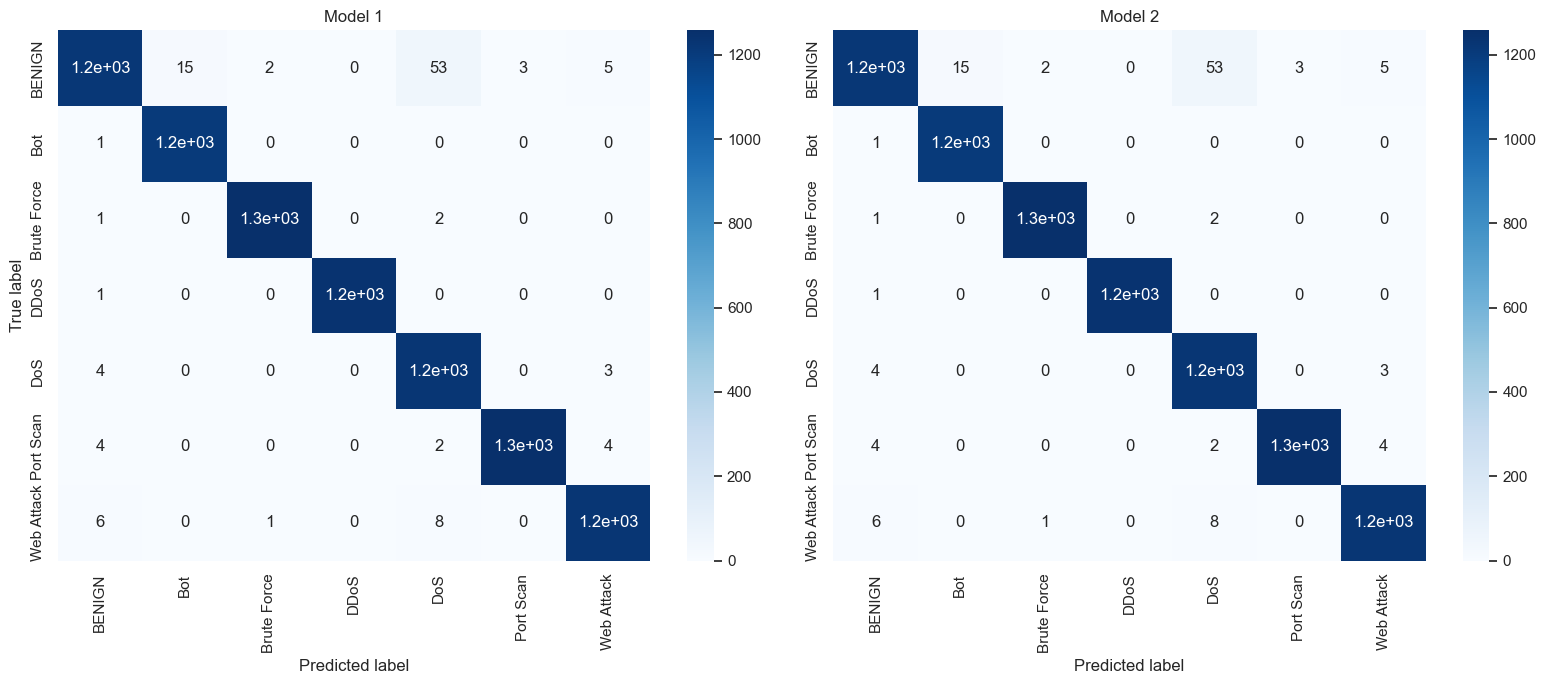

In [54]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

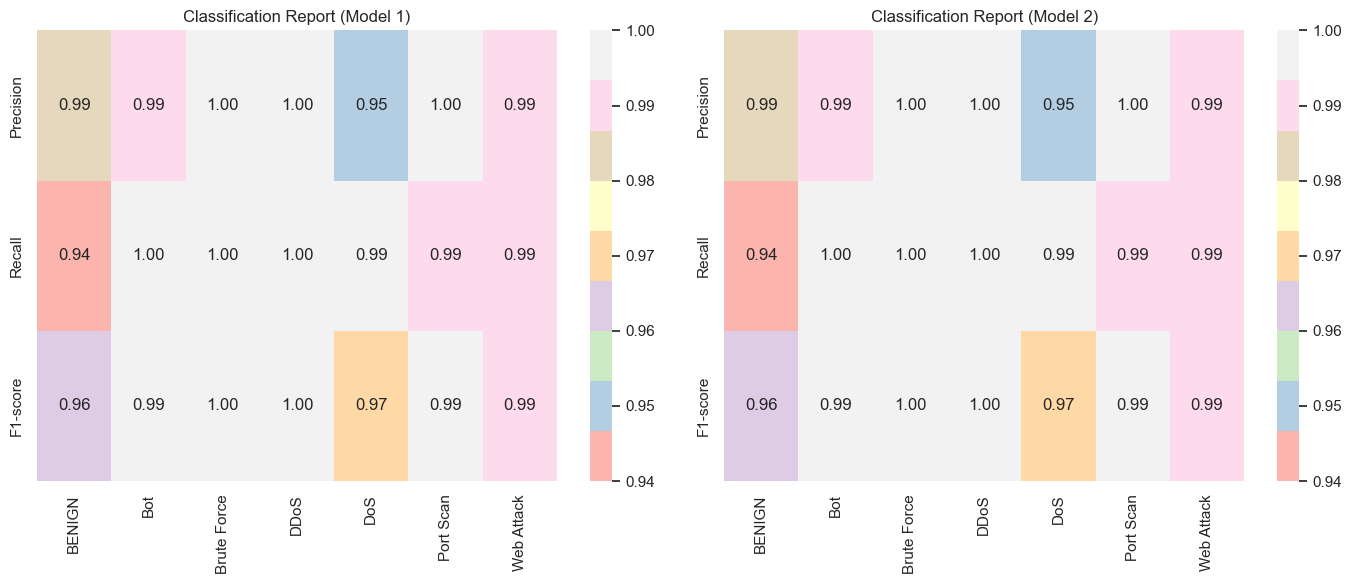

In [55]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

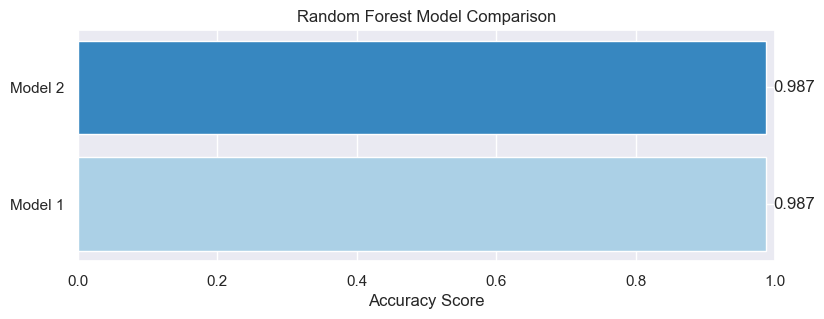

In [56]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

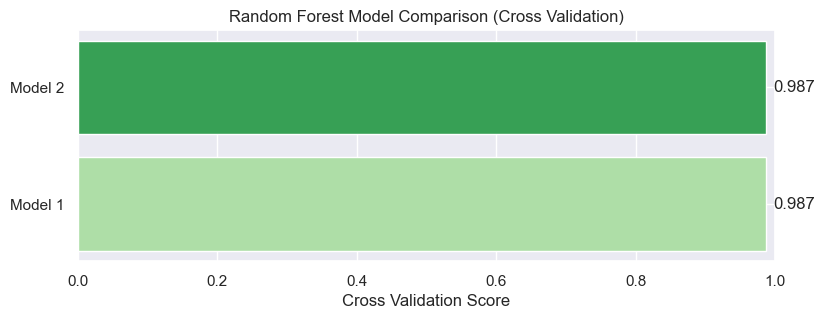

In [57]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_rf1.mean(), cv_rf2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Random Forest Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [58]:
from sklearn2pmml import PMMLPipeline, sklearn2pmml

# Create a PMML pipeline
pipeline = PMMLPipeline([
    ("classifier", rf1)
])

# Export the model to PMML format
sklearn2pmml(pipeline, "model1.pmml", with_repr=True)

In [59]:
from sklearn2pmml import PMMLPipeline, sklearn2pmml

# Create a PMML pipeline
pipeline = PMMLPipeline([
    ("classifier", rf2)
])

# Export the model to PMML format
sklearn2pmml(pipeline, "model2.pmml", with_repr=True)